
# Анализ данных о сердечно-сосудистых заболеваниях (поиск инсайтов, составление рекомендаций стейкхолдерам)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


Чтение CSV-файла

In [ ]:
cardio = pd.read_csv('cardio_train.csv', sep = ';')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Фактические данные:**

 • gender - пол, категориальный признак, 1 - женский, 2 - мужской.

 • age - возраст, количественный признак, указан в днях.

 • height - рост, количественный признак, указан в см.

 • weight - вес, количественный признак, указан в кг.

 **Поведенческие факторы:**

• smoke - курение, категориальный признак, 1 - да, 0 - нет.

• alco - употребление алкоголя, категориальный признак, 1 - да, 0 - нет.

• active - физическая активность, категориальный признак, 1 - да, 0 - нет.  

**Диагностические данные:**

• ap_hi - систолическое кровяное давление, количественный признак.

• lo_hi - диастолическое кровяное давление, количественный признак.

• cholesterol - уровень холестерина в крови, категориальный признак, 1 - норма, 2 - выше нормы,  3 -  значительно выше нормы.

• gluc - уровень сахара в крови, категориальный признак, 1 - норма, 2 - выше нормы, 3 - значительно выше нормы.

• cardio - сердечно-сосудистое заболевание, категориальный признак, 1 - да, 0 - нет.


In [ ]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


 Есть ли какие-либо 'NA' или отсутствующие значения в наборе данных?

In [ ]:
cardio.isnull().values.any()

np.False_

# Чистим датафрейм от выбросов

# **Рост, вес и давление**

Используем функцию для удаления значений, которые находятся ниже 1% или выше 98,5% заданного диапазона веса и роста и давления.(этого хватает что-бы данные стали нормальными)

In [ ]:
def remove_outliers(cardio, column):
    lower_bound = cardio[column].quantile(0.01)
    upper_bound = cardio[column].quantile(0.985)
    return cardio[(cardio[column] >= lower_bound) & (cardio[column] <= upper_bound)]


cardio = remove_outliers(cardio, 'height')
cardio = remove_outliers(cardio, 'weight')
cardio = remove_outliers(cardio, 'ap_hi')
cardio = remove_outliers(cardio, 'ap_lo')
cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Удалим записи, в которых диастолическое давление выше систолического.

In [ ]:
cardio = cardio.drop(cardio[cardio['ap_lo']> cardio['ap_hi']].index)

Смотрим остаток строк и качество данных веса, роста и давления.

In [ ]:
cardio[['height', 'weight', 'ap_hi', 'ap_lo' ]].describe()

,height,weight,ap_hi,ap_lo
count,64563.000000,64563.000000,64563.000000,64563.000000
mean,164.372071,73.444832,125.811595,81.013011
std,7.193009,12.503746,15.004292,8.800720
min,147.000000,48.000000,90.000000,60.000000
25%,159.000000,65.000000,120.000000,80.000000
50%,165.000000,72.000000,120.000000,80.000000
75%,169.000000,81.000000,140.000000,90.000000
max,182.000000,112.000000,170.000000,110.000000


# Первичный анализ и обработка данных

Для удобства интерпретации переведите «возраст» из дней в годы.

In [ ]:
cardio['age_years'] = cardio['age']//365.25
cardio.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.0


Удаляем возраст в днях.

In [ ]:
cardio = cardio.drop(columns=['age'])
cardio.head(5)

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.0
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.0


Выводим столбец bmi - индекс массы тела - это показатель, который отражает соотношение веса человека и его роста. Он широко используется в медицине для оценки риска хронических заболеваний.

In [ ]:
cardio['bmi'] = cardio['weight']/((cardio['height']/100)**2)
cardio.head(5)

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.0,23.507805
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.0,23.011177


Создание круговой диаграммы для распределения по половому признаку: 1)женщины - 65%, 2)мужчины - 35%

In [ ]:
cardio['gender'].value_counts()

,count
gender,
1,45530
2,24470


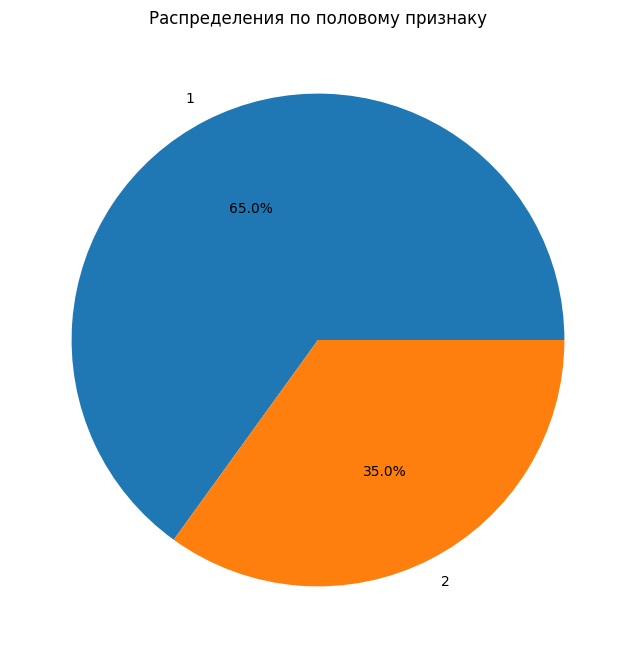

In [ ]:
cardio_gender = cardio.groupby('gender').size()

# Создание круговой диаграммы
cardio_gender.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))#, dpi=80
plt.title("Распределения по половому признаку")
plt.ylabel("")
plt.show()

Создание круговой диаграммы для понимания наличия/отсутствия ССЗ.

In [ ]:
cardio['cardio'].value_counts()

,count
cardio,
0,33025
1,31538


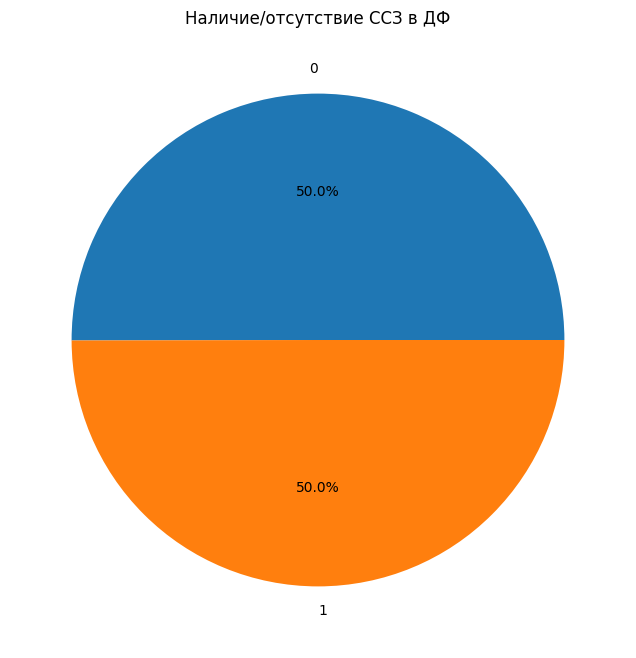

In [ ]:
cardio_cardio = cardio.groupby('cardio').size()

# Создание круговой диаграммы
cardio_cardio.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))#, dpi=80
plt.title("Наличие/отсутствие ССЗ в ДФ")
plt.ylabel("")
plt.show()

#Рейтинг по индексу массы тела(для упрощения визуализации).

In [ ]:
rating = []
for row in cardio['bmi']:
    if row < 18.5 :    rating.append(1) #Выраженный дефецит массы тела
    elif row > 18.5 and row  < 24.9:   rating.append(2)#Норма
    elif row > 24.9 and row < 29.9:  rating.append(3)#Избыточная масса тела (предожирение)
    elif row > 29.9 and row < 34.9:  rating.append(4)#Ожирение 1 степени
    elif row > 34.9 and row < 39.9:  rating.append(5)#Ожирение 2 степени
    elif row > 39.9 and row < 59.9:  rating.append(6)#Ожирение 3 степени
    else:
      rating.append('Not_Rated')

cardio['bmi_rating'] = rating
cardio.head(5)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,age_years,bmi,bmi_rating
0,2,168,62.0,110,80,1.0,1.0,0.0,50.0,21.967120,2
1,1,156,85.0,140,90,3.0,1.0,1.0,55.0,34.927679,5
2,1,165,64.0,130,70,3.0,1.0,1.0,51.0,23.507805,2
3,2,169,82.0,150,100,1.0,1.0,1.0,48.0,28.710479,3
4,1,156,56.0,100,60,1.0,1.0,0.0,47.0,23.011177,2


#Рейтинг по систолическому кровеносному давлению

In [ ]:
rating = []
for row in cardio['ap_hi']:
    if row < 120 :    rating.append(1) #Оптимальное артериальное давление(АД)
    elif row >= 120 and row  < 130:   rating.append(2)#Нормальное АД
    elif row >= 130 and row < 140:  rating.append(3)#Высокое нормальное АД
    elif row >= 140 and row < 160:  rating.append(4)#Артериальная гипертензия 1-й степени
    elif row >= 160 and row < 180:  rating.append(5)#Артериальная гипертензия 2-й степени
    elif row >= 180:  rating.append(6)#Артериальная гипертензия 3-й степени
    else:
      rating.append('Not_Rated')

cardio['ap_hi_rating'] = rating
cardio.head(5)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,age_years,bmi,bmi_rating,ap_hi_rating
0,2,168,62.0,110,80,1.0,1.0,0.0,50.0,21.967120,2,1
1,1,156,85.0,140,90,3.0,1.0,1.0,55.0,34.927679,5,4
2,1,165,64.0,130,70,3.0,1.0,1.0,51.0,23.507805,2,3
3,2,169,82.0,150,100,1.0,1.0,1.0,48.0,28.710479,3,4
4,1,156,56.0,100,60,1.0,1.0,0.0,47.0,23.011177,2,1


#Градация по возрасту

In [ ]:
cardio['age_bin'] = pd.cut(
    cardio['age_years'],
    bins=[30, 35, 40, 45, 50, 55, 60, 65],
    labels=['30-35', '35-40', '40-45', '45-50', '50-55', '55-60',
            '60-65' ],
    right=True
)
cardio.head(5)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,age_years,bmi,bmi_rating,ap_hi_rating,age_bin
0,2,168,62.0,110,80,1.0,1.0,0.0,50.0,21.967120,2,1,45-50
1,1,156,85.0,140,90,3.0,1.0,1.0,55.0,34.927679,5,4,50-55
2,1,165,64.0,130,70,3.0,1.0,1.0,51.0,23.507805,2,3,50-55
3,2,169,82.0,150,100,1.0,1.0,1.0,48.0,28.710479,3,4,45-50
4,1,156,56.0,100,60,1.0,1.0,0.0,47.0,23.011177,2,1,45-50


# Создаем два ДФ для Мужчин и Женщин для анализа влияния факторов возникновения ССЗ на гендер.

In [ ]:
cardio_male = cardio.query("gender == 2")
cardio_female = cardio.query("gender == 1")
cardio_male.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,age_years,bmi,bmi_rating,ap_hi_rating,age_bin
0,2,168,62.0,110,80,1.0,1.0,0.0,50.0,21.967120,2,1,45-50
3,2,169,82.0,150,100,1.0,1.0,1.0,48.0,28.710479,3,4,45-50
7,2,178,95.0,130,90,3.0,3.0,1.0,61.0,29.983588,4,3,60-65
11,2,173,60.0,120,80,1.0,1.0,0.0,51.0,20.047446,2,2,50-55
12,2,165,60.0,120,80,1.0,1.0,0.0,40.0,22.038567,2,2,35-40


#Визуализация и анализ данных
Визуализация и анализ данных категорий у которых наблюдается высокая корреляция целевой переменной **cardio** с ИМТ, давлением, сахаром, холестерином и возрастом.

# Визуализация корреляции между целевой переменной cardio и индекса массы тела (BMI)
Распределение индекса массы тела (bmi) среди всех данных, отдельно для мужчин и отдельно для женщин, с учетом наличия сердечно-сосудистых заболеваний.

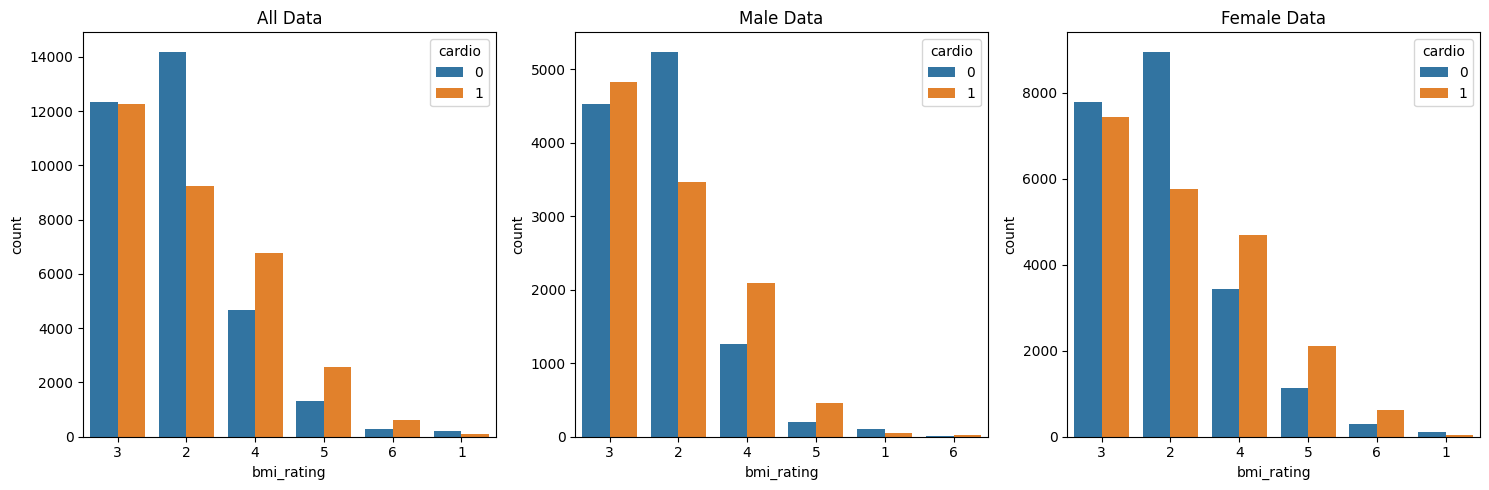

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=cardio['bmi_rating'],order=cardio['bmi_rating'].value_counts().index,hue=cardio['cardio'],ax=axs[0])
sns.countplot(x=cardio_male['bmi_rating'],order=cardio_male['bmi_rating'].value_counts().index,hue=cardio_male['cardio'],ax=axs[1])
sns.countplot(x=cardio_female['bmi_rating'],order=cardio_female['bmi_rating'].value_counts().index,hue=cardio_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

Вывод: Наибольший риск ССЗ у мужчин в 3, 4, 5 категориях - это индексы массы тела с предожирением и ожирением. Мужчины 1 и 2 категорией с дефицитом и нормальным ИМТ менее всего подвержены ССЗ.

У женщин наибольший риск ССЗ в 4, 5, 6 категориях - это индексы массы тела с ожирением 1,2,3 степени. Во 2 категории с нормальным ИМТ и 3 категории с избыточной массой тела (предожирение) женщины менее всего подвержены ССЗ.

#Визуализация корреляции между целевой переменной cardio и систолического давления.

Поскольку систолическое и диастолическое давление - два связанных признака и возникновение ССЗ связано, в первую очередь, с уровнем систолического давления, то в дальнейшем анализе будем рассматривать только этот признак.

Распределение систолического давления среди всех данных, отдельно для мужчин и отдельно для женщин, с учетом наличия сердечно-сосудистых заболеваний.


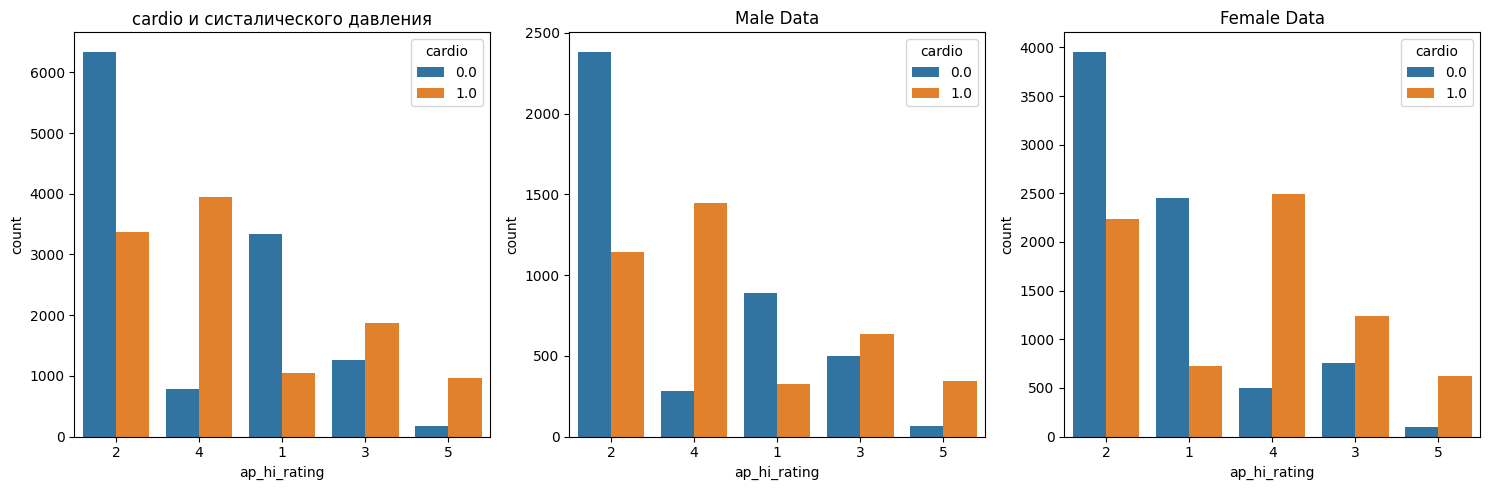

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=cardio['ap_hi_rating'],order=cardio['ap_hi_rating'].value_counts().index,hue=cardio['cardio'],ax=axs[0])
sns.countplot(x=cardio_male['ap_hi_rating'],order=cardio_male['ap_hi_rating'].value_counts().index,hue=cardio_male['cardio'],ax=axs[1])
sns.countplot(x=cardio_female['ap_hi_rating'],order=cardio_female['ap_hi_rating'].value_counts().index,hue=cardio_female['cardio'],ax=axs[2])

axs[0].set_title('cardio и систалического давления')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

Вывод: У мужчин повышенное систолическое давление > 130 увеличивает шанс возникновения ССЗ.

У женщин повышенное систолическое давление > 140 увеличивает шанс возникновения ССЗ.
     



# Визуализация корреляции между целевой переменной cardio и возрастом.

Влияние возраста среди всех данных, отдельно для мужчин и отдельно для женщин, с учетом наличия сердечно-сосудистых заболеваний.

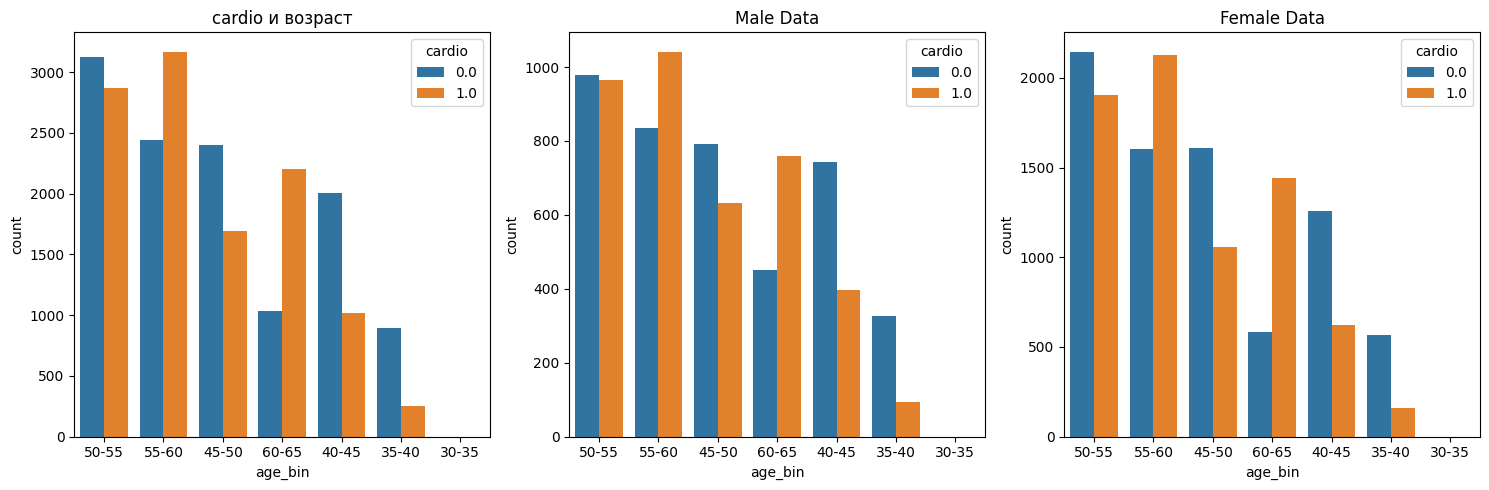

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=cardio['age_bin'],order=cardio['age_bin'].value_counts().index,hue=cardio['cardio'],ax=axs[0])
sns.countplot(x=cardio_male['age_bin'],order=cardio_male['age_bin'].value_counts().index,hue=cardio_male['cardio'],ax=axs[1])
sns.countplot(x=cardio_female['age_bin'],order=cardio_female['age_bin'].value_counts().index,hue=cardio_female['cardio'],ax=axs[2])

axs[0].set_title('cardio и возраст')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

Вывод: У мужчин и женщин начиная с 55лет повышается риск заболеваемости ССЗ


# Визуализация корреляции между целевой переменной cardio и уровнем холестерина в крови.

Распределение уровня холестерина в крови среди всех данных, отдельно для мужчин и отдельно для женщин, с учетом наличия сердечно-сосудистых заболеваний.

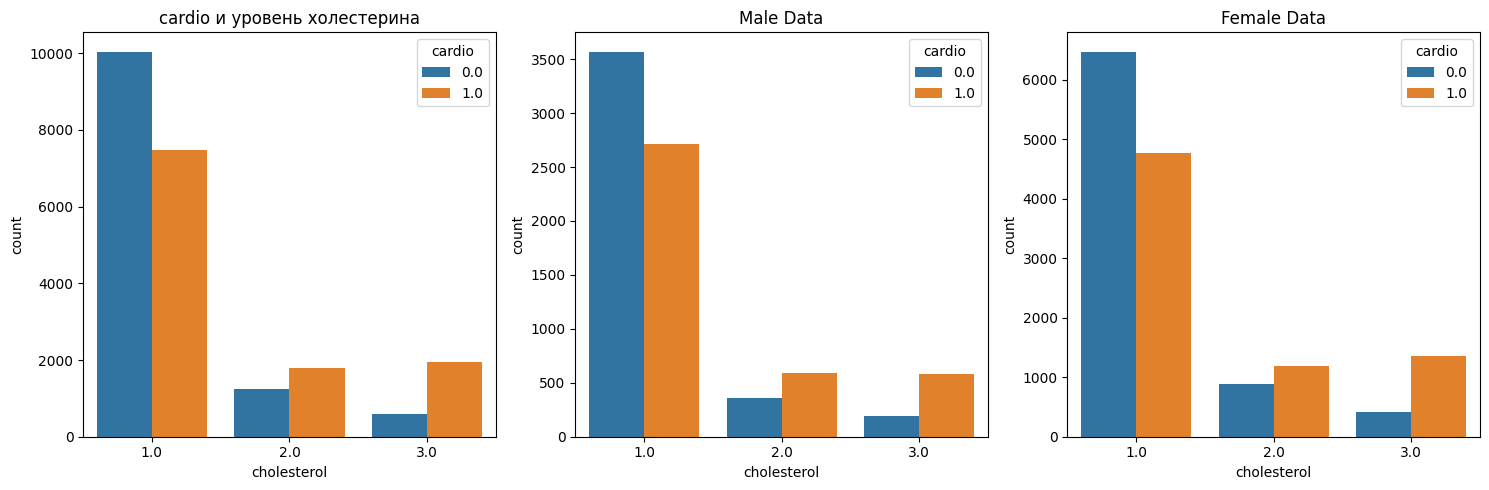

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=cardio['cholesterol'],order=cardio['cholesterol'].value_counts().index,hue=cardio['cardio'],ax=axs[0])
sns.countplot(x=cardio_male['cholesterol'],order=cardio_male['cholesterol'].value_counts().index,hue=cardio_male['cardio'],ax=axs[1])
sns.countplot(x=cardio_female['cholesterol'],order=cardio_female['cholesterol'].value_counts().index,hue=cardio_female['cardio'],ax=axs[2])

axs[0].set_title('cardio и уровень холестерина')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

1 - норма, 2 - выше нормы, 3 - значительно выше нормы.

Вывод: Холестерин в крови 2 - выше нормы, 3 - значительно выше нормы, повышает уровень заболеваемости ССЗ для мужчин и женщин одинаково.

# Визуализация корреляции между целевой переменной cardio и сахаром в крови.

Распределение уровня сахара в крови среди всех данных, отдельно для мужчин и отдельно для женщин, с учетом наличия сердечно-сосудистых заболеваний.

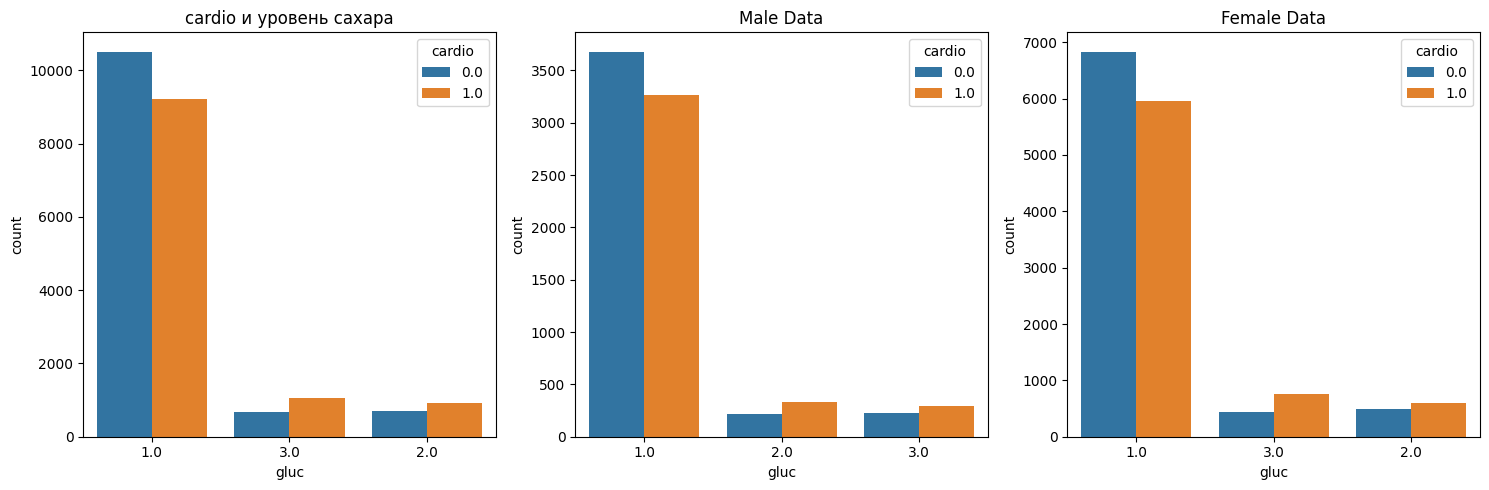

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=cardio['gluc'],order=cardio['gluc'].value_counts().index,hue=cardio['cardio'],ax=axs[0])
sns.countplot(x=cardio_male['gluc'],order=cardio_male['gluc'].value_counts().index,hue=cardio_male['cardio'],ax=axs[1])
sns.countplot(x=cardio_female['gluc'],order=cardio_female['gluc'].value_counts().index,hue=cardio_female['cardio'],ax=axs[2])

axs[0].set_title('cardio и уровень сахара')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

1 - норма, 2 - выше нормы, 3 - значительно выше нормы.

Вывод: Сахар в крови 2 - выше нормы, 3 - значительно выше нормы, повышант уровень заболеваемости ССЗ для мужчин и женщин одинаково.

# Визуализация корреляции между переменной уровнем холестерина в крови и уровнем сахара в крови.

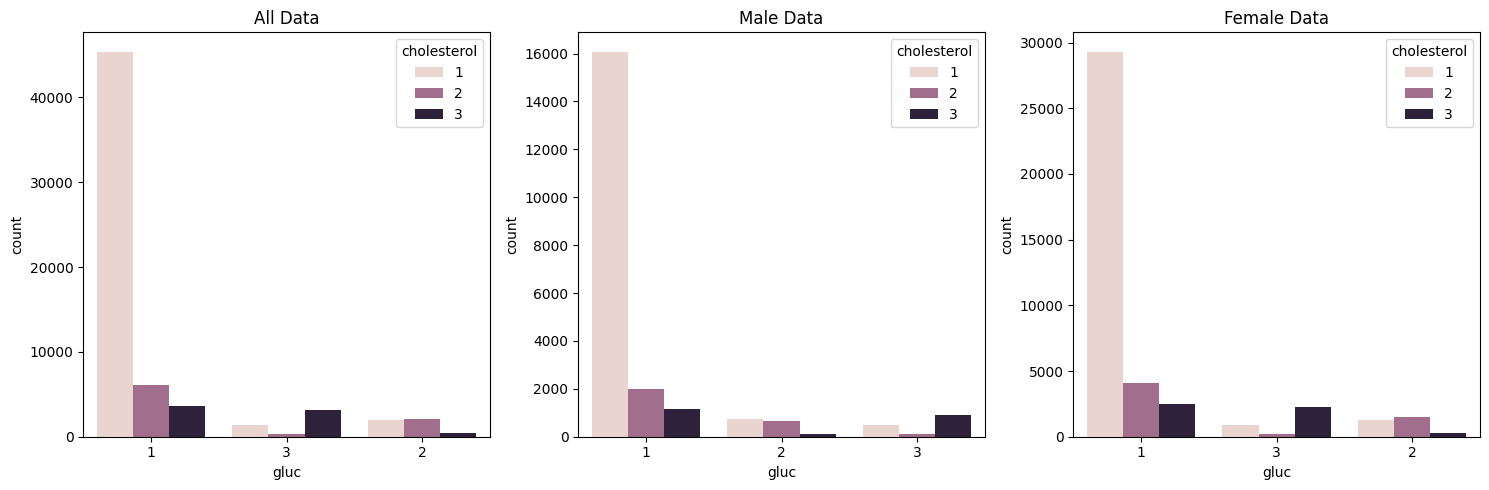

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=cardio['gluc'],order=cardio['gluc'].value_counts().index,hue=cardio['cholesterol'],ax=axs[0])
sns.countplot(x=cardio_male['gluc'],order=cardio_male['gluc'].value_counts().index,hue=cardio_male['cholesterol'],ax=axs[1])
sns.countplot(x=cardio_female['gluc'],order=cardio_female['gluc'].value_counts().index,hue=cardio_female['cholesterol'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

Категории для переменных уровень холестерина в крови и уровень сахара в крови.
1 - норма, 2 - выше нормы, 3 - значительно выше нормы.

Вывод: У людей с 1 - нормальным, уровнем сахара в крови в подавляющем 1 - нормальный уровень холестерина в крови.

У мужчин и женщин с повышением уровня сахара в крови 2 - выше нормы, 3 - значительно выше нормы, диспропорционально повышается уровень холестерина в крови.

Женщины более подвержены проблемам с высоким содержаниям сахара и холестерина в крови.

# Корреляционная матрица данных

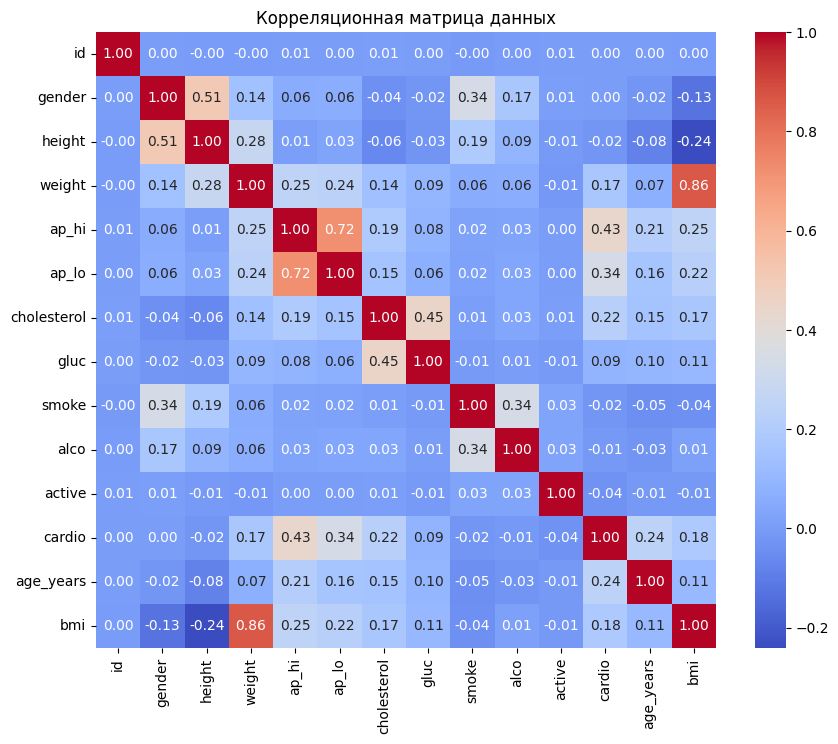

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cardio.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица данных')
plt.show()

#Удаление столбцов с низкой корреляцией для улучшения визуализации.
Замечено отсутствие корреляции целевой переменной cardio с "Поведенческими факторами" такими как алкоголь, курение и активность(спорт).
Поэтому очистим ДФ от данных столбцов + столбец ID так как у него нулевая корреляция со всеми остальными столбцами для большей наглядности корреляционной матрицы.

In [ ]:
cardio = cardio.drop(columns=['smoke', 'alco', 'active', 'id'])

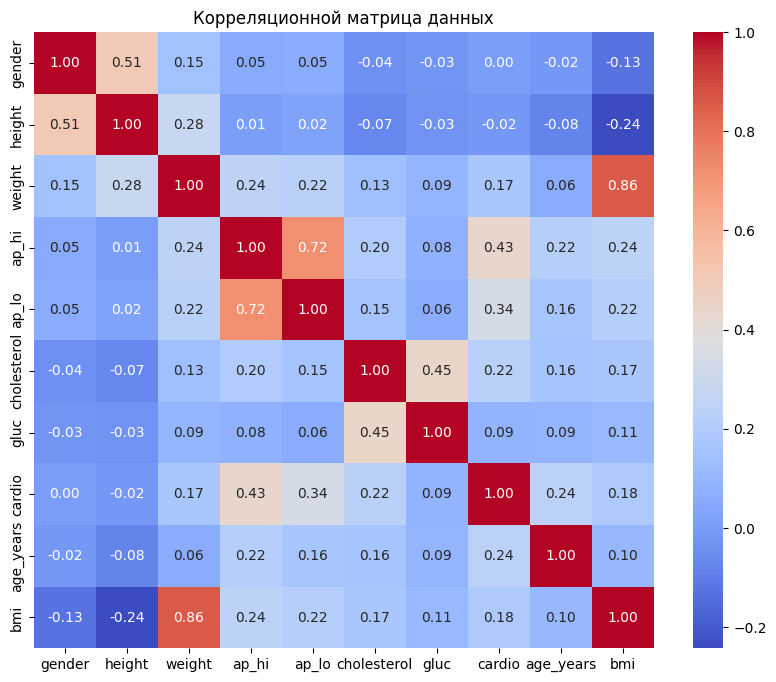

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cardio.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционной матрица данных')
plt.show()

# Вывод по Корреляционной матрице:
1)Наблюдается корреляция целевой переменной **cardio** с весом, ИМТ, давлением, сахаром в крови, холестерином и возрастом.

давлением: ap_hi - 0.43, ap_lo - 0.34

уровень холестерина: cholesterol - 0.22

уровень сахара: gluc - 0.09

возраст: age_years - 0.24

ИМТ: bmi - 0.19.

2)Сильная корреляция между холестерином: cholesterol и сахарм в крови: gluc - 0.45.

3)Также замечена отсутствие корреляции целевой переменной **cardio** с "Поведенческими факторами" такими как алкоголь, курение и активность(спорт)(что очень странно).

# Ввод по проведенному анализу данных о сердечно-сосудистых заболеваниях.

Наибольшая корреляция наблюдается между целевой переменной cardio с весом, ИМТ, давлением, сахаром в крови, холестерином и возрастом.

Диагностические признаки (давление, уровень холестерина и сахара в крови) являются одними из ключевых показателей для контроля риска возникновения ССЗ

Максимальный риск ССЗ мужчин у которых ИМТ начиная с предожирения(3), повышенное систолическое давление > 130, с возраста 55лет, также когда уровень холестерина и сахара в крови 2 - выше нормы.

У женщин максимальный риск ССЗ когда ИМТ начиная с ожирение 1 степени(4), повышенное систолическое давление > 140, с возраста 55лет, также когда уровень холестерина и сахара в крови 2 - выше нормы.

Рекомендации: Контролировать ИМТ так как оно имеет достаточно высокую корреляцию с диагностическими признаки (давление, уровень холестерина и сахара в крови) высокий показатель которых значительно повышают шанс заболеваемости ССЗ. С возрастом от 50лет требуется более частые медицинские обследования сердечно сосудистой системы.

Не выявлено негативного влияния поведенческих признаков курения и алкоголя на риск возникновения ССЗ, что не сходится с официальными данными Всемирной Организации Здравоохранения(ВОЗ).

